In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dds_ch2_nyt/nyt1.csv')

In [41]:
df_list = []
for day in range(1, 32):
    df = pd.read_csv('dds_ch2_nyt/nyt' + str(day) + '.csv')
    df['Day'] = day
    df_list.append(df)

In [42]:
df = pd.concat(df_list)

In [50]:
df.index = pd.Series(range(len(df)))

In [4]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [5]:
df['Gender_cat'] =  df['Gender'].astype('category')

In [6]:
df['Age_cat'] = pd.cut(df['Age'], [0, 18, 24, 34, 44, 54, 64, np.inf], right=True, include_lowest=True)

In [7]:
df['Age_cat'] = df['Age_cat'].cat.rename_categories(['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

In [8]:
clicks_by_age = df.groupby(['Age_cat'])['Clicks'].sum()



In [67]:
sums = df.groupby(['Age_cat', 'Gender_cat', 'Signed_In']).agg(count=('Age', 'count'), 
                                                              clicks=('Clicks', 'sum'),
                                                             impressions=('Impressions', 'sum'))

In [87]:
by_age = sums.groupby(['Age_cat']).sum()

In [90]:
by_age['CTR'] = by_age['clicks']/ by_age['impressions'] 

In [94]:
by_age['Index'] = np.arange(len(by_age))

In [95]:
by_age

,count,clicks,impressions,CTR,Index
Age_cat,,,,,
<18,156358,22003,781723,0.028147,0
18-24,35270,1709,176584,0.009678,1
25-34,58174,2937,290511,0.010110,2
35-44,70860,3662,355824,0.010292,3
45-54,64288,3232,322109,0.010034,4
55-64,44738,4556,224688,0.020277,5
65+,28753,4350,144120,0.030183,6


In [111]:
by_age

,count,clicks,impressions,CTR,Index
Age_cat,,,,,
<18,156358,22003,781723,0.028147,0
18-24,35270,1709,176584,0.009678,1
25-34,58174,2937,290511,0.010110,2
35-44,70860,3662,355824,0.010292,3
45-54,64288,3232,322109,0.010034,4
55-64,44738,4556,224688,0.020277,5
65+,28753,4350,144120,0.030183,6


In [ ]:
young = sums.query('Age_cat == "<18"')

# Impressions by age group

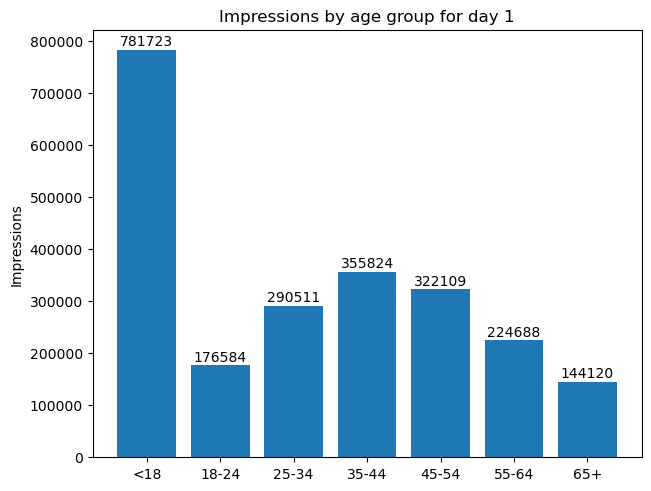

In [113]:
fig, ax = plt.subplots(layout='constrained')
rects = ax.bar(by_age['Index'], by_age['impressions'], label=by_age.index)
ax.bar_label(rects, padding=1)#, fmt='%.5f')

ax.set_ylabel('Impressions');
ax.set_title('Impressions by age group for day 1');
ax.set_xticks(by_age['Index'], by_age.index);

# CTR by age group

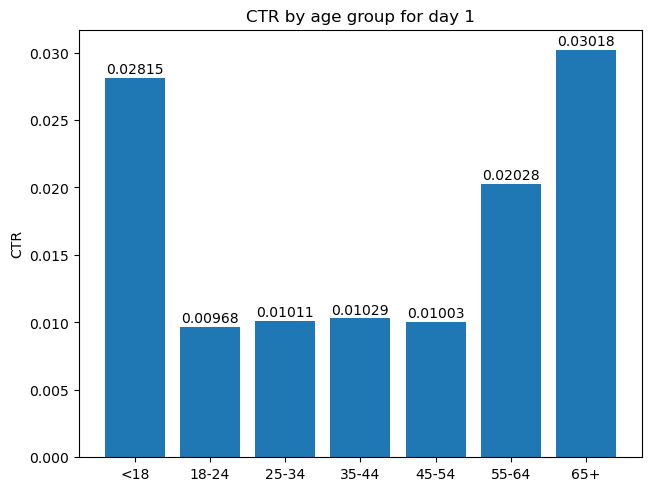

In [110]:
fig, ax = plt.subplots(layout='constrained')
rects = ax.bar(by_age['Index'], by_age['CTR'], label=by_age.index)
ax.bar_label(rects, padding=1, fmt='%.5f')

ax.set_ylabel('CTR');
ax.set_title('CTR by age group for day 1');
ax.set_xticks(by_age['Index'], by_age.index);

# CTR distribution and categories

In [118]:
df['Clicks'].describe(percentiles=np.arange(10)/10)

count    458441.000000
mean          0.092594
std           0.309973
min           0.000000
0%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           0.000000
80%           0.000000
90%           0.000000
max           4.000000
Name: Clicks, dtype: float64

In [136]:
df.groupby('Clicks').count()['Age']

Clicks
0    418603
1     37372
2      2330
3       127
4         9
Name: Age, dtype: int64

### Vast majority of people don't click at all...

In [126]:
signed_in_percentage = df.groupby(['Signed_In']).count()['Age']

In [127]:
signed_in_percentage

Signed_In
0    137106
1    321335
Name: Age, dtype: int64

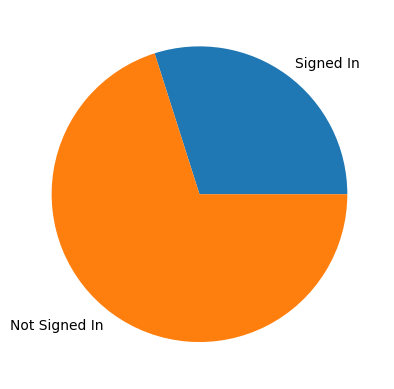

In [134]:
plt.pie(signed_in_percentage, labels=['Signed In', 'Not Signed In']);

## Check if there are clicks without impressions

In [135]:
df[df['Clicks'] > df['Impressions']]

,Age,Gender,Impressions,Clicks,Signed_In,Gender_cat,Age_cat


# No...

# Check gender stats

In [141]:
by_gender = df.groupby(['Gender']).agg(clicks=('Clicks', 'sum'), impressions=('Impressions', sum))
by_gender['ctr'] = by_gender['clicks'] / by_gender['impressions'] 

In [142]:
by_gender

,clicks,impressions,ctr
Gender,,,
0,30672,1452782,0.021113
1,11777,842777,0.013974


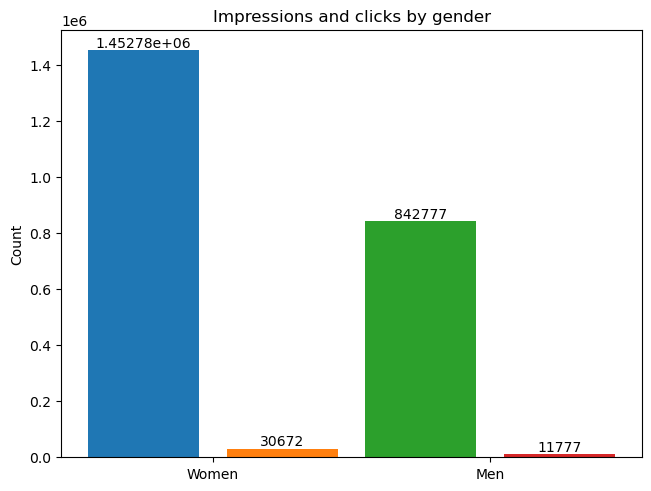

In [168]:
# plt.bar([1,2], by_gender['ctr'])

fig, ax = plt.subplots(layout='constrained')

bars = [
ax.bar(0, by_gender.loc[0, 'impressions']),
ax.bar(1, by_gender.loc[0, 'clicks']),
ax.bar(2, by_gender.loc[1, 'impressions']),
ax.bar(3, by_gender.loc[1, 'clicks'])]

for bar in bars:
    ax.bar_label(bar)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count');
ax.set_title('Impressions and clicks by gender');
ax.set_xticks([0.5, 2.5], ["Women", "Men"]);
# ax.legend(loc='best')
# ax.set_ylim(0, 250)

[(1, 9), (2, 8), (3, 7)]